In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

#Data Loading

In [0]:
import pandas as pd
link ='https://drive.google.com/open?id=1ntjxiHT6c619MJb5JYjmQtLZAgKsgTrW'

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id})

downloaded.GetContentFile('Dataset.csv')

train_news = pd.read_csv('Dataset.csv',encoding= 'unicode_escape')


In [3]:
print(train_news.shape)
train_news.head()


(2225, 2)


,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
print("Checking data qualitites...")
train_news.isnull().sum()
train_news.info()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


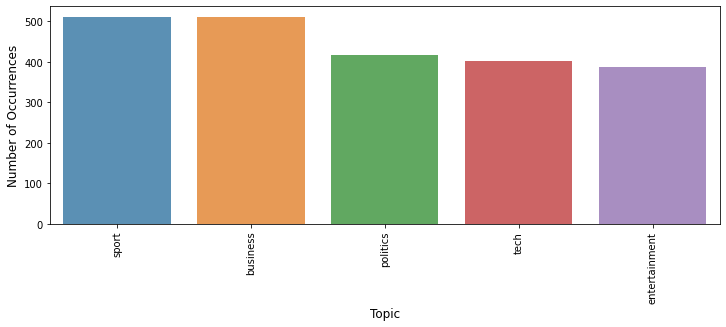

In [6]:
topic = train_news['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(topic.index, topic.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#Data Preprocessing

In [0]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [8]:
train_news['news'][0]

'China had role in Yukos split-up\n \n China lent Russia $6bn (Â£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n \n The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n \n According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s former owner, if CNPC had become a shareholder. Rosneft an

In [0]:
train_news['news']=train_news['news'].apply(clean_text)

In [10]:
train_news['news'][0]

'china role yuko split china lent russia help russian govern renationalis kei yuganskneftega unit oil group yuko reveal kremlin said tuesdai russian state bank veb lent state own rosneft help bui yugansk turn came chines bank revel came russian govern said rosneft sign long term oil suppli deal china deal see rosneft receiv credit china cnpc accord russian newspap vedomosti credit pai loan rosneft receiv financ purchas yugansk report said cnpc offer yugansk return provid financ compani opt long term oil suppli deal instead analyst said factor influenc chines decis possibl litig yuko yugansk owner cnpc sharehold rosneft veb declin comment compani rosneft cnpc agre pre payment long term deliveri said russian oil offici sergei oganesyan unusu pre payment year announc help explain rosneft medium size indebt rel unknown firm abl financ surpris purchas yugansk yugansk sold auction year help yuko pai unpaid tax fine embattl russian oil giant previous file bankruptci protect court attempt prev

#Highlighting Frequent Word for each Category

In [0]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [0]:
#function to grenerate word cloud

def MakeWordCloud(genre,type):
  wordcloud = WordCloud(background_color="black", width = 1000, height = 500).generate(''.join(str(genre['news'])))
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud)
  plt.title(type, fontsize=30)
  plt.axis("off")
  plt.show()

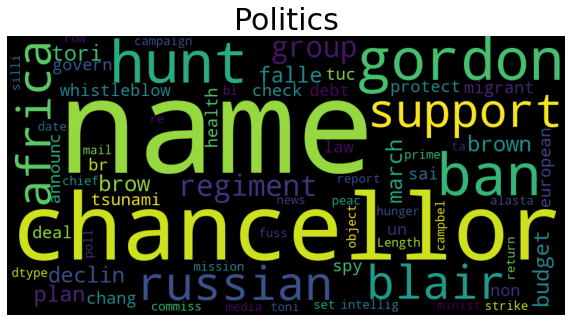

In [13]:
#politics
politics = train_news[train_news['type'] == 'politics']
MakeWordCloud(politics,"Politics")

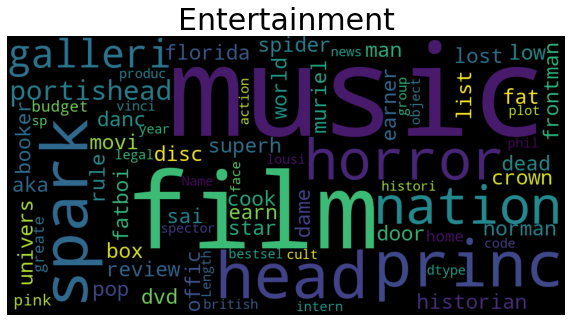

In [14]:

#entertainment
entertainment = train_news[train_news['type'] == 'entertainment']
MakeWordCloud(entertainment,"Entertainment")

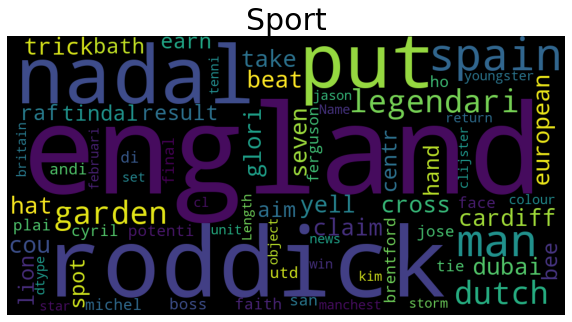

In [15]:
#sport
sport = train_news[train_news['type'] == 'sport']
MakeWordCloud(sport,"Sport")

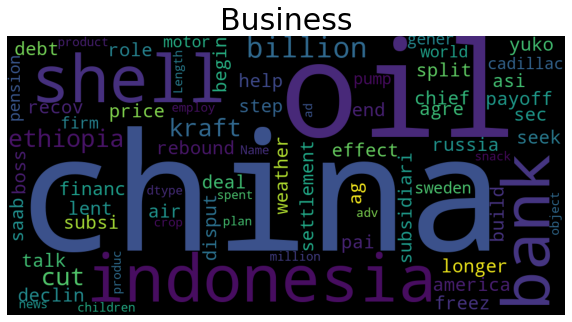

In [16]:

#business
business = train_news[train_news['type'] == 'business']
MakeWordCloud(business,"Business")

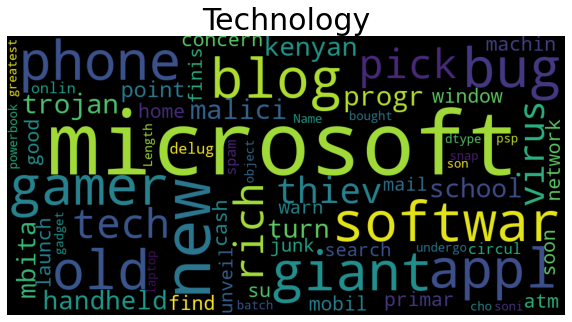

In [17]:
#technology
technology = train_news[train_news['type'] == 'tech']
MakeWordCloud(technology,"Technology")

In [0]:

x_train=train_news['news']
y_train=train_news['type']

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}


In [0]:
category_to_id = {'business':0,  'entertainment':1, 'politics':2, 'sport':3,'tech':4}
id_to_category = {0: 'business', 1: 'entertainment' , 2: 'politics', 3: 'sport',4: 'tech'}


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.4,random_state=1056)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(1335,)
(1335,)
(890,)
(890,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X_train).toarray()
labels=Y_train
X_test=tfidf.transform(X_test)

In [23]:
features


array([[0.        , 0.08157394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0714442 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10906438, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
labels

array([2, 4, 2, ..., 3, 1, 0])

In [25]:

from sklearn.feature_selection import chi2

N = 5  # We are going to look for top 5  categories

#For each category, find words that are highly corelated to it

for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   
  indices = np.argsort(features_chi2[0])                                  
  feature_names = np.array(tfidf.get_feature_names())[indices]            
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]         
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 5 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 5 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . analyst
       . growth
       . profit
       . oil
       . bank
  . Most correlated bigrams:
       . chief execut
       . econom growth
       . oil price
       . stock market
       . analyst said
# 'entertainment':
  . Most correlated unigrams:
       . oscar
       . actor
       . star
       . award
       . film
  . Most correlated bigrams:
       . best director
       . won best
       . best film
       . film festiv
       . box offic
# 'politics':
  . Most correlated unigrams:
       . parti
       . blair
       . elect
       . labour
       . tori
  . Most correlated bigrams:
       . liber democrat
       . gener elect
       . toni blair
       . lib dem
       . prime minist
# 'sport':
  . Most correlated unigrams:
       . injuri
       . match
       . cup
       . champion
       . coach
  . Most correlated bigrams:
       . world number
       . world cup
       . champion leagu
       . australian open
   

In [0]:
##dimension reduction 
from sklearn.manifold import TSNE
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) 

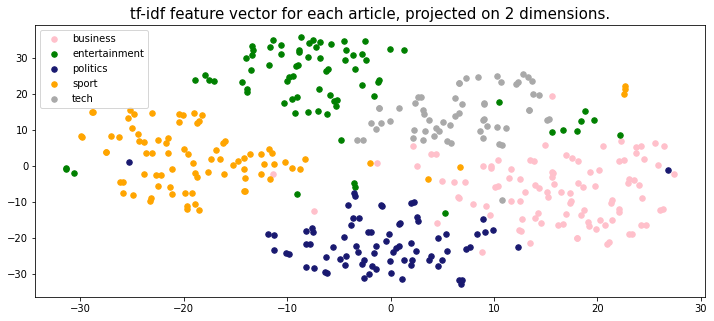

In [27]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Finding points belonging to each category and plot them
plt.figure(figsize=(12,5))
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id)]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",fontdict=dict(fontsize=15))
plt.legend()

#Model selection and Prediction

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



In [0]:
models = [   
    RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0),
    MultinomialNB( ),
    SVC(kernel='rbf'),
    LogisticRegression(random_state=0)
]

In [0]:
CV =5

#Creating a data frame that will store the results for all 5 trials of the 4 different models

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='f1_weighted' , cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

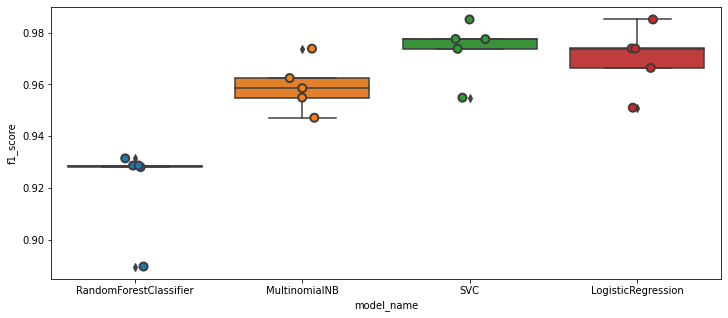

In [31]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_score'])
import seaborn as sns
plt.figure(figsize=(12,5))
sns.boxplot(x='model_name', y='f1_score', data=cv_df)
sns.stripplot(x='model_name', y='f1_score', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [32]:
cv_df.groupby('model_name').f1_score.mean()

model_name
LogisticRegression        0.970041
MultinomialNB             0.959365
RandomForestClassifier    0.921275
SVC                       0.973753
Name: f1_score, dtype: float64

In [33]:

cv_df

,model_name,fold_idx,f1_score
0,RandomForestClassifier,0,0.928641
1,RandomForestClassifier,1,0.931413
2,RandomForestClassifier,2,0.928032
3,RandomForestClassifier,3,0.889625
4,RandomForestClassifier,4,0.928664
5,MultinomialNB,0,0.958538
6,MultinomialNB,1,0.962450
7,MultinomialNB,2,0.973811
8,MultinomialNB,3,0.954904
9,MultinomialNB,4,0.947120


In [0]:
svc=SVC(kernel='rbf')
svc.fit(features,labels)
X_test=X_test.toarray()
Y_pred=svc.predict(X_test)


In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred, labels=[0,1, 2,]))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       196
           1       0.98      0.99      0.98       142
           2       0.96      0.98      0.97       168

   micro avg       0.96      0.98      0.97       506
   macro avg       0.96      0.98      0.97       506
weighted avg       0.96      0.98      0.97       506



In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9764044943820225


Text(0.5, 15.0, 'Predicted')

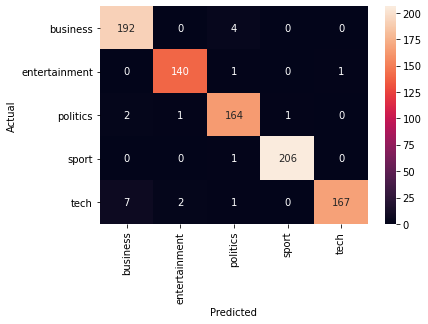

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
lbl=['business',  'entertainment', 'politics', 'sport','tech']
conf_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=lbl, yticklabels=lbl)
plt.ylabel('Actual')
plt.xlabel('Predicted')